####Linear Regression

In [88]:
import torch

In [2]:
print(torch.cuda.is_available())

True


In [3]:
x_train=torch.FloatTensor([[1],[2],[3]])
y_train=torch.FloatTensor([[3],[5],[7]])

In [26]:
W=torch.zeros(1,requires_grad=True)
b=torch.zeros(1,requires_grad=True)
hypothesis=x_train*W+b

In [28]:
optimizer=torch.optim.SGD([W,b],lr=0.15)

In [29]:
for epoch in range(10): 
  hypothesis=x_train*W+b
  cost=torch.mean((hypothesis-y_train)**2)

  print('W: {:.3f} b: {:.3f} Cost: {:.3f}'.format(W.item(),b.item(),cost.item()))
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

W: 0.000 b: 0.000 Cost: 27.667
W: 3.400 b: 1.500 Cost: 12.197
W: 1.140 b: 0.510 Cost: 5.377
W: 2.638 b: 1.173 Cost: 2.371
W: 1.641 b: 0.738 Cost: 1.046
W: 2.301 b: 1.032 Cost: 0.462
W: 1.860 b: 0.842 Cost: 0.204
W: 2.151 b: 0.973 Cost: 0.090
W: 1.956 b: 0.891 Cost: 0.040
W: 2.083 b: 0.950 Cost: 0.018


### Multivariate Linear Regression

In [41]:
import torch.nn as nn
import torch.nn.functional as F

class MultivaraiteLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(3,1)
  def forward(self,x):
    return self.linear(x)

In [42]:
x_train=torch.FloatTensor([[73,80,75],
                          [93,88,93],
                          [89,91,90],
                          [96,98,100],
                          [73,66,70]])
y_train=torch.FloatTensor([[152],[185],[180],[196],[142]])

W=torch.zeros((3,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

model=MultivaraiteLinearRegressionModel()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-5)

for epoch in range(20):
    Hypothesis=model(x_train)
    cost=F.mse_loss(Hypothesis,y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print('Hypothesis: {}, Cost: {:.6f}'.format(Hypothesis.squeeze().detach(),cost.item()))

Hypothesis: tensor([-37.8342, -43.5507, -43.8927, -47.6521, -32.9086]), Cost: 45671.945312
Hypothesis: tensor([45.6260, 56.7626, 54.9476, 59.9825, 43.6053]), Cost: 14316.120117
Hypothesis: tensor([ 92.3523, 112.9244, 110.2846, 120.2432,  86.4427]), Cost: 4487.734375
Hypothesis: tensor([118.5126, 144.3674, 141.2658, 153.9809, 110.4259]), Cost: 1407.057007
Hypothesis: tensor([133.1587, 161.9713, 158.6110, 172.8693, 123.8532]), Cost: 441.428040
Hypothesis: tensor([141.3584, 171.8270, 168.3219, 183.4443, 131.3708]), Cost: 138.754974
Hypothesis: tensor([145.9490, 177.3450, 173.7586, 189.3648, 135.5797]), Cost: 43.883018
Hypothesis: tensor([148.5191, 180.4344, 176.8025, 192.6794, 137.9362]), Cost: 14.145424
Hypothesis: tensor([149.9579, 182.1640, 178.5066, 194.5351, 139.2556]), Cost: 4.824200
Hypothesis: tensor([150.7634, 183.1324, 179.4606, 195.5741, 139.9943]), Cost: 1.902423
Hypothesis: tensor([151.2142, 183.6747, 179.9947, 196.1557, 140.4080]), Cost: 0.986545
Hypothesis: tensor([151.4666

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# ====== Generating Dataset ====== #
num_data = 2400
x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)
X = np.array([x1, x2]).T
y = 2*np.sin(x1) + np.log(0.5*x2**2) + e
# ====== Split Dataset into Train, Validation, Test ======#
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]


In [90]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self): 
        super(LinearModel, self).__init__() #상속받았을때 써줘야함
        self.linear = nn.Linear(in_features=2, out_features=1, bias=True) #랜덤으로 초기화된 W,b 생성
    
    def forward(self, x):
    # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴합니다.
        return self.linear(x)
    
    
class MLPModel(nn.Module):
    def __init__(self): 
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
    # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴합니다.
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [91]:
lm=LinearModel()
print(lm.linear.weight)
print(lm.linear.bias)
print(lm.forward(torch.FloatTensor([[1,1]])))

Parameter containing:
tensor([[ 0.2906, -0.4399]], requires_grad=True)
Parameter containing:
tensor([0.7024], requires_grad=True)
tensor([[0.5532]], grad_fn=<AddmmBackward>)


In [92]:
reg_loss = nn.MSELoss()  #loss function

In [93]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

model = MLPModel() # Model을 생성해줍니다.
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) # 복잡해보이지만 간단히 모델 내에 학습을 당할 파라미터 수를 카운팅하는 코드입니다.

# ===== Construct Optimizer ====== #
lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr) # Optimizer를 생성해줍니다.

# 매 학습 단계에서의 epoch값과 그 때의 loss 값을 저장할 리스트를 만들어줍시다.
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []


epoch = 4000
for i in range(epoch):
    
    # ====== Train ====== #
    model.train() # model을 train 모드로 세팅합니다. 반대로 향후 모델을 평가할 때는 eval() 모드로 변경할 겁니다 (나중 실습에서 쓸 겁니다)
    optimizer.zero_grad() # optimizer에 남아있을 수도 있는 잔여 그라디언트를 0으로 다 초기화해줍니다.
    
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)
    
    loss = reg_loss(pred_y.squeeze(), true_y) #pred_y 의 shape 이 (1600,1) 나와서 그냥 1600으로 바꿔줌
    loss.backward() # backward()를 통해서 그라디언트를 구해줍니다.
    optimizer.step()
    
    list_epoch.append(i)
    list_train_loss.append(loss.item())
    
    
    # ====== Validation ====== #
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)   
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    

    # ====== Evaluation ======= #
    if i % 200 == 0: # 200회의 학습마다 실제 데이터 분포와 모델이 예측한 분포를 그려봅니다.
        
        # ====== Calculate MAE ====== #
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy() 
        mae = mean_absolute_error(true_y, pred_y) # sklearn 쪽 함수들은 true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것에 주의합시다
        list_mae.append(mae)
        list_mae_epoch.append(i)

801 parameters


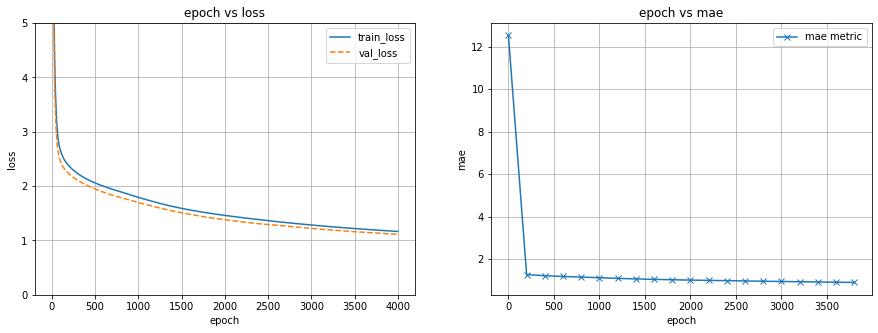

In [65]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()

###Classification


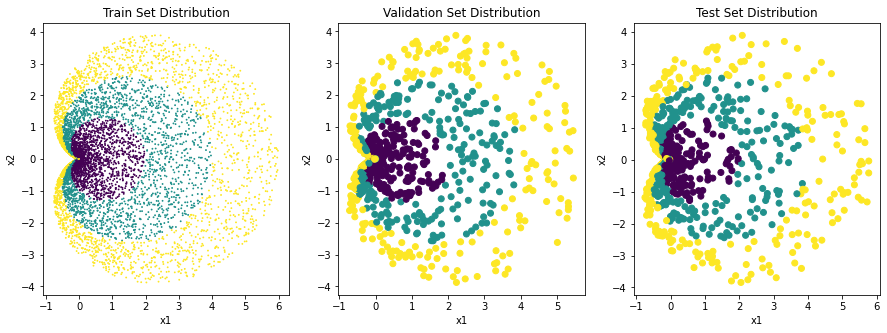

In [67]:
import numpy as np
import matplotlib.pyplot as plt


# ====== Generating Dataset ====== #
r = np.random.rand(10000)*3
theta = np.random.rand(10000)*2*np.pi
y = r.astype(int)
r = r * (np.cos(theta) + 1)
x1 = r * np.cos(theta)
x2 = r * np.sin(theta)
X = np.array([x1, x2]).T

# ====== Split Dataset into Train, Validation, Test ======#
train_X, train_y = X[:8000, :], y[:8000]
val_X, val_y = X[8000:9000, :], y[8000:9000]
test_X, test_y = X[9000:, :], y[9000:]

# ====== Visualize Each Dataset ====== #
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, s=0.7)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('Train Set Distribution')


ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(val_X[:, 0], val_X[:, 1], c=val_y)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Validation Set Distribution')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(test_X[:, 0], test_X[:, 1], c=test_y)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Test Set Distribution')

plt.show()

In [85]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((8000, 2), (8000,), (1000, 2), (1000,))

In [84]:
train_y

array([0, 1, 2, ..., 2, 0, 2])

In [68]:
#model 내에서 softmax 사용할 필요x. loss function 에 들어가 있음.
import torch
import torch.nn as nn


class LinearModel(nn.Module):
    def __init__(self): 
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=2, out_features=3, bias=True)
    
    def forward(self, x):
        x = self.linear(x)
        return x

    
class MLPModel(nn.Module):
    def __init__(self): 
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=3)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [69]:
cls_loss=nn.CrossEntropyLoss()
#input은 N x M 차원을 가지면 되며 float 형태
#target은 N 차원을 가지고 각 엘리먼트는 i 번째 클래스를 나타내는 int형태

In [71]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# ====== Construct Model ====== #
# model = LinearModel()
# print(model.linear.weight)
# print(model.linear.bias)

model = MLPModel() # Model을 생성해줍니다.
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) # 복잡해보이지만 간단히 모델 내에 학습을 당할 파라미터 수를 카운팅하는 코드입니다.

# ===== Construct Optimizer ====== #
lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)

# 매 학습 단계에서의 epoch값과 그 때의 loss 값을 저장할 리스트를 만들어줍시다.
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []


epoch = 4000 
for i in range(epoch):
    
    # ====== Train ====== #
    model.train() 
    optimizer.zero_grad() 
    
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y).long()  #crossentropyloss 에 넣을거라서 정수형으로 바꿔줘야함!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    pred_y = model(input_x)

    
    loss = cls_loss(pred_y.squeeze(), true_y)
    loss.backward() 
    optimizer.step() 
    list_epoch.append(i)
    list_train_loss.append(loss.item()))
    
    
    # ====== Validation ====== #
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y).long()
    pred_y = model(input_x)   
    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.item())
    

    # ====== Evaluation ======= #
    if i % 200 == 0: # 200회의 학습마다 실제 데이터 분포와 모델이 예측한 분포를 그려봅니다.
        
        # ====== Calculate Accuracy ====== #
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
        acc = accuracy_score(true_y, pred_y) # sklearn 쪽 함수들은 true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것에 주의합시다
        list_acc.append(acc)
        list_acc_epoch.append(i)

1203 parameters


In [81]:
pred_y.shape, pred_y.squeeze().shape, true_y.shape

(torch.Size([1000, 3]), torch.Size([1000, 3]), torch.Size([1000]))

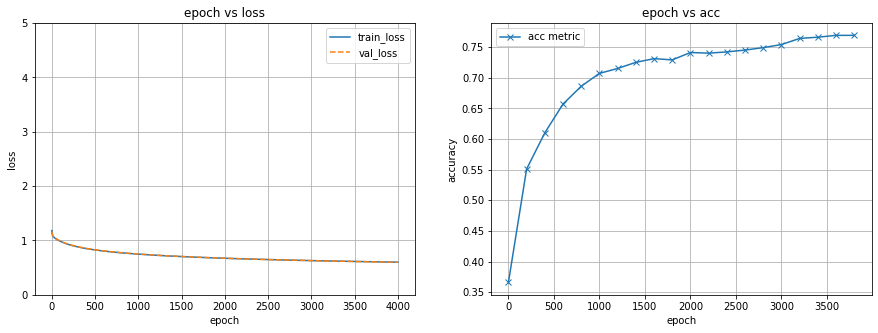

In [74]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='acc metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs acc')


plt.show()